In [0]:
%matplotlib inline
from fastai.gen_doc.nbdoc import *
from fastai.vision import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

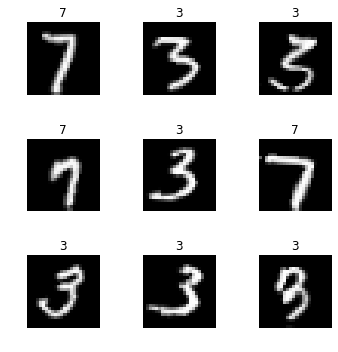

In [4]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

In [0]:
learn = create_cnn(data, models.resnet18, metrics=[accuracy])

In [7]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.199594,0.076864,0.972522,00:25
1,0.122649,0.058779,0.978901,00:23


In [0]:
learn.save('stage-1')

In [9]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [0]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


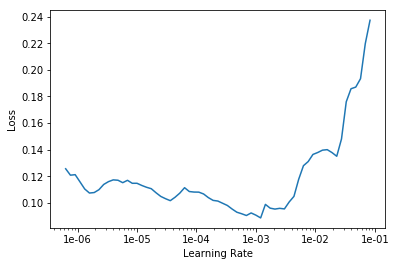

In [12]:
learn.recorder.plot()


In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.091281,0.039984,0.987242,00:24
1,0.074839,0.034116,0.988224,00:24


In [0]:
learn.save('fer2013-stage-2')

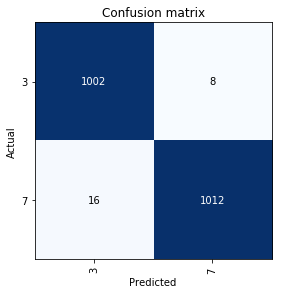

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()